# Lab 1 - Introduction to Jupyter Notebook and Python

#### This lab was an introduction to Jupyter Notebook, NumPy, and Pandas to ensure students had properly set up their development environments.

###  <font color="green">Import necesary libraries</font>

In [1]:
import pandas as pd             #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
import numpy as np              # https://numpy.org/doc/stable/user/quickstart.html
import matplotlib.pyplot as plt # https://matplotlib.org/stable/tutorials/introductory/pyplot.html

###  <font color="green">Pandas</font>

In [2]:
dataset = pd.read_csv('Data.csv')
dataset.head()    # returns the first n rows for the object (default = 5) 

,Department,Age,Tution,Enrolled
0,Math,24.0,32000.0,No
1,CSC,17.0,48000.0,Yes
2,ECE,20.0,24000.0,No
3,CSC,18.0,31000.0,No
4,ECE,21.0,NaN,Yes


In [3]:
X = dataset.iloc[:, :-1].values # numpy array
print(X)

[['Math' 24.0 32000.0]
 ['CSC' 17.0 48000.0]
 ['ECE' 20.0 24000.0]
 ['CSC' 18.0 31000.0]
 ['ECE' 21.0 nan]
 ['Math' 25.0 28000.0]
 ['CSC' nan 32000.0]
 ['Math' 18.0 29000.0]
 ['ECE' 19.0 33000.0]
 ['Math' 19.0 27000.0]]


In [4]:
Y = dataset.iloc[:, -1]  # dataframe
print(Y)

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Enrolled, dtype: object


In [5]:
# alternatively
Y = dataset['Enrolled']
Y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Enrolled, dtype: object

### <font color="green">Handling missing data</font>

In [6]:
from sklearn.impute import SimpleImputer # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer()
imputer.fit(X[:, 1:3])
(X[:, 1:3]) = imputer.transform(X[:, 1:3])
X

array([['Math', 24.0, 32000.0],
       ['CSC', 17.0, 48000.0],
       ['ECE', 20.0, 24000.0],
       ['CSC', 18.0, 31000.0],
       ['ECE', 21.0, 31555.555555555555],
       ['Math', 25.0, 28000.0],
       ['CSC', 20.11111111111111, 32000.0],
       ['Math', 18.0, 29000.0],
       ['ECE', 19.0, 33000.0],
       ['Math', 19.0, 27000.0]], dtype=object)

### <font color="green">Write a brief description of what SimpleImputer does and describes its actions in the context of the above example.</font>

### <font color="red">The fifth line (ECE, 21.0, NaN) had no value for tuition. SimpleImputer inferred the value by averaging all other tuitions, and returned that average (31555.5). In this situation, it determined the average tuition paid and replaced a null value with the inferred tuition.</font>

### <font color="green">Numpy</font>

In [7]:
type(X)

numpy.ndarray

In [8]:
X.shape  # returns the dimensions of the numpy array

(10, 3)

In [9]:
X.size   # returns the total number of elements of the numpy array

30

### <font color="green">Data visualization example (Matplotlib)</font>

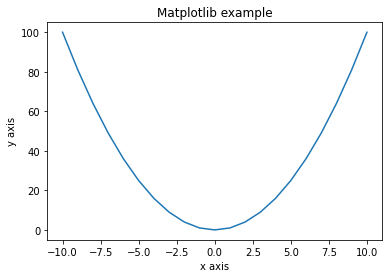

In [10]:
x = np.arange(-10,11) # (start, stop(exclusive)[-10, -9, ..., 9, 10])
y = x*x 
plt.title("Matplotlib example") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(x,y) 
plt.show()

### <font color="green">Simple regression with sklearn</font>

In [11]:
df = pd.read_csv('Data2.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print(y_test)

[ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


### <font color="green">Visualizing result</font>

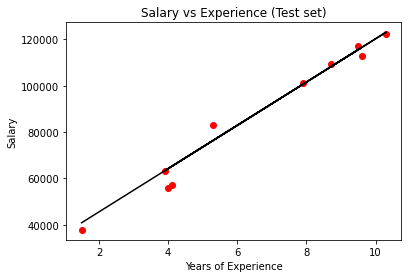

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'black')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### <font color="green">Plot the function $f(x)=x^{2}$.</font>

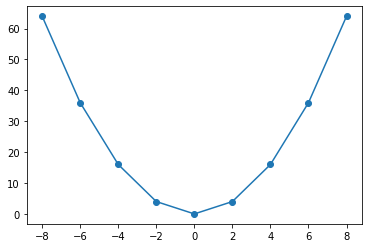

In [15]:
x = np.arange(-8,9,2)
y = x ** 2

plt.scatter(x, y)
plt.plot(x, y)
plt.show()

### <font color="green">Create a bar chart of the given data.</font>

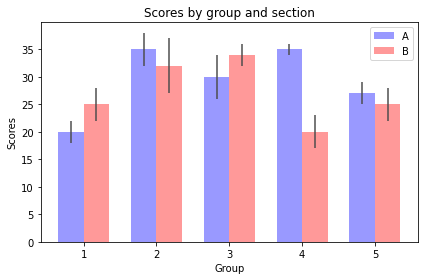

In [16]:
n_groups = 5

means_A = (20, 35, 30, 35, 27)
std_A = (2, 3, 4, 1, 2)

means_B = (25, 32, 34, 20, 25)
std_B = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_A, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_A,
                 error_kw=error_config,
                 label='A')

rects2 = plt.bar(index + bar_width, means_B, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_B,
                 error_kw=error_config,
                 label='B')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and section')
plt.xticks(index + bar_width / 2, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

### <font color="green">Generate 5000 numbers using a standard normal distrobution and display a histogram of the data.</font>

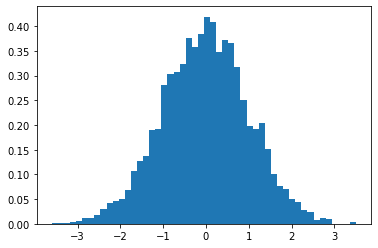

In [17]:
x = np.random.randn(5000)

# Make a normed histogram.
plt.hist(x, bins=50, density=True)
plt.show()

### <font color="green">Pick a polynominal function and generate 500 random points (uniform distribution) along the function for a range of your choice. To each of those points, add some random noise (normal distribution).</font>

### <font color="green">Plot the points and the function and include an appropriate axes labels, a title, and a legend.</font>

### <font color="red">Daniel Harnden's Code:</font>

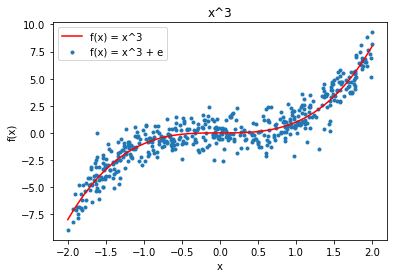

In [18]:
# The minimum and maximum x values for the function
low, high = -2, 2

# The base function. I chose to use y = x^3, which is plotted in red
xCubed = np.linspace(low, high, 500)
yCubed = xCubed ** 3
plt.plot(xCubed, yCubed, c='r', label = 'f(x) = x^3')

# The 500 points with randomized noise added to the y value, plotted in blue
xCubedNoise = np.random.uniform(low, high, 500)
noise = np.random.randn(500)
yCubedNoise = xCubedNoise ** 3 + noise
plt.scatter(xCubedNoise, yCubedNoise, marker='.', label='f(x) = x^3 + e')

# Table labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x^3')
plt.legend(loc='upper left')
plt.show()

### <font color="green">Generate and plot a histogram with 10 bins of the squared error of your data, and generate and plot a histogram with 25 bins of the noise in your data. Give each plot appropriate axes and a title.</font>

### <font color="red">Daniel Harnden's Code:</font>

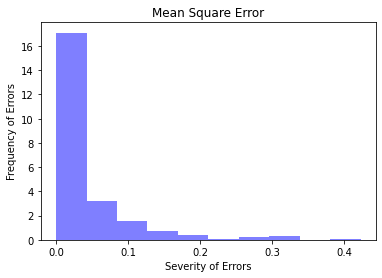

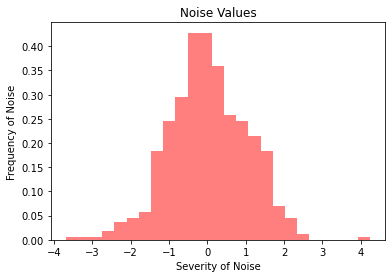

In [19]:
# Generates the mean square error of the function x^3 and x^3 + e
mse = yCubed - yCubedNoise
mse = mse * mse
mse = mse / 500 # Number of noise points generated

# Plots the mean square error into a histogram with ten bins
plt.hist(mse, bins=10, density=True, fc=(0, 0, 1, 0.5))
plt.xlabel('Severity of Errors')
plt.ylabel('Frequency of Errors')
plt.title('Mean Square Error')
plt.show()

# Uses the previously generated noise values to plot a histogram
plt.hist(noise, bins=25, density=True, fc=(1, 0, 0, 0.5))
plt.xlabel('Severity of Noise')
plt.ylabel('Frequency of Noise')
plt.title('Noise Values')
plt.show()
